In [1]:
import pandas as pd

In [2]:
women_data = pd.read_csv('Data/women/combined_data.csv')

In [29]:
# Convert 'STATE/UT' to uppercase
women_data['STATE/UT'] = women_data['STATE/UT'].str.upper()

# Perform the groupby operation correctly
statewise = women_data.groupby(['STATE/UT', 'Year'])[['Rape', 
    'Kidnapping and Abduction', 
    'Dowry Deaths', 
    'Assault on women with intent to outrage her modesty', 
    'Insult to modesty of Women', 
    'Cruelty by Husband or his Relatives', 
    'Importation of Girls']].sum()

# Reset the index to work with row-wise totals
statewise_reset = statewise.reset_index()

# Calculate the row-wise total for each row
statewise_reset['Total'] = statewise_reset[['Rape', 
    'Kidnapping and Abduction', 
    'Dowry Deaths', 
    'Assault on women with intent to outrage her modesty', 
    'Insult to modesty of Women', 
    'Cruelty by Husband or his Relatives', 
    'Importation of Girls']].sum(axis=1)

# Display the resulting DataFrame with row-wise totals
statewise_reset


,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,A & N ISLANDS,2001,6,4,0,38,2,18,0,68
1,A & N ISLANDS,2002,4,2,0,34,6,8,0,54
2,A & N ISLANDS,2003,4,4,0,18,4,14,0,44
3,A & N ISLANDS,2004,20,6,0,12,6,10,0,54
4,A & N ISLANDS,2005,8,2,0,22,2,10,0,44
...,...,...,...,...,...,...,...,...,...,...
486,WEST BENGAL,2010,4622,5528,1014,4930,326,35592,16,52028
487,WEST BENGAL,2011,4726,7422,1020,4726,400,39544,0,57838
488,WEST BENGAL,2012,4092,8336,1186,6690,1112,39730,24,61170
489,WEST BENGAL,2013,3370,7660,962,9826,1154,36232,18,59222


In [30]:
# Save the combined data to a new CSV file
statewise_reset.to_csv("Data/women/combined_data1.csv", index=False)

In [37]:
# Year-wise data
women_data = pd.read_csv('Data/women/combined_data.csv')
year_wise = women_data.groupby('Year')[['Rape', 
    'Kidnapping and Abduction', 
    'Dowry Deaths', 
    'Assault on women with intent to outrage her modesty', 
    'Insult to modesty of Women', 
    'Cruelty by Husband or his Relatives', 
    'Importation of Girls']].sum()
year_wise_reset = year_wise.reset_index()
year_wise_reset['Total'] = year_wise_reset[['Rape', 
    'Kidnapping and Abduction', 
    'Dowry Deaths', 
    'Assault on women with intent to outrage her modesty', 
    'Insult to modesty of Women', 
    'Cruelty by Husband or his Relatives', 
    'Importation of Girls']].sum(axis=1)
year_wise_reset

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total
0,2001,32150,29290,13702,68248,19492,98340,228,261450
1,2002,32746,29012,13644,67886,20310,98474,152,262224
2,2003,31694,26592,12416,65878,24650,101406,92,262728
3,2004,36466,31156,14052,69134,20002,116242,178,287230
4,2005,36718,31500,13574,68350,19968,116638,298,287046
5,2006,38696,34828,15236,73234,19932,126256,134,308316
6,2007,41474,40832,16186,77468,21900,151860,122,349842
7,2008,42934,45878,16344,80826,24428,162688,134,373232
8,2009,42794,51482,16766,77422,22018,179092,96,389670
9,2010,44344,59590,16782,81226,19922,188082,72,410018


In [38]:
year_wise_reset.to_csv("Data/women/year_wise.csv", index=False)

In [46]:
# from yearwise take data and add column population and literacy rate from population.csv
population_data = pd.read_csv('population.csv')
population_data = population_data[['Year','Population', 'Literacy Rate']]
year_wise_data = pd.read_csv('Data/women/year_wise.csv')
merged_df = pd.merge(year_wise_data, population_data, on='Year', how='inner')
merged_df['Crime_Rate'] = merged_df['Total'] / merged_df['Population'] * 1000000
merged_df

,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total,Population,Literacy Rate,Crime_Rate
0,2001,32150,29290,13702,68248,19492,98340,228,261450,1078970907,64.83,242.314226
1,2002,32746,29012,13644,67886,20310,98474,152,262224,1098313039,65.69,238.751604
2,2003,31694,26592,12416,65878,24650,101406,92,262728,1117415123,66.57,235.121214
3,2004,36466,31156,14052,69134,20002,116242,178,287230,1136264583,67.46,252.784434
4,2005,36718,31500,13574,68350,19968,116638,298,287046,1154638713,68.36,248.602439
5,2006,38696,34828,15236,73234,19932,126256,134,308316,1172373788,69.28,262.984385
6,2007,41474,40832,16186,77468,21900,151860,122,349842,1189691809,70.20,294.061031
7,2008,42934,45878,16344,80826,24428,162688,134,373232,1206734806,71.14,309.290822
8,2009,42794,51482,16766,77422,22018,179092,96,389670,1223640160,72.09,318.451464
9,2010,44344,59590,16782,81226,19922,188082,72,410018,1240613620,73.06,330.496130


In [55]:
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target = merged_df['Total']

Linear Regression Mean Squared Error: 97575087.90617709
Linear Regression Accuracy: 0.9868056654395059

Random Forest Mean Squared Error: 374866037.4853335
Random Forest Accuracy: 0.9493097262827564

Gradient Boosting Mean Squared Error: 379890848.8743574
Gradient Boosting Accuracy: 0.948630259382005



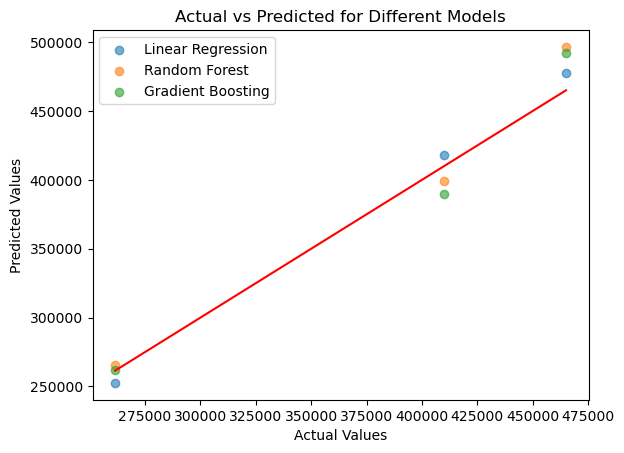

Linear Regression Future Predictions for Total Crimes: [635243.52669538]
Random Forest Future Predictions for Total Crimes: [593460.34]
Gradient Boosting Future Predictions for Total Crimes: [641395.08520825]


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    accuracy = model.score(X_test, y_test)

    print(f'{model_name} Mean Squared Error: {mse}')
    print(f'{model_name} Accuracy: {accuracy}\n')

    # Plotting actual vs predicted values
    plt.scatter(y_test, predictions, label=model_name, alpha=0.6)

# Step 5: Formatting the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted for Different Models')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 6: Predicting future values
future_years = pd.DataFrame({
    'Year': [2014],
    'Population': [1307246509],  # Example future populations
    'Literacy Rate': [78.08]  # Example future literacy rates
})

for model_name, model in models.items():
    future_predictions = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions}")


Linear Regression for Total Mean Squared Error: 97575087.90617709
Linear Regression for Total Accuracy: 0.9868056654395059

Random Forest for Total Mean Squared Error: 374866037.4853335
Random Forest for Total Accuracy: 0.9493097262827564

Gradient Boosting for Total Mean Squared Error: 379890848.8743574
Gradient Boosting for Total Accuracy: 0.948630259382005

Support Vector Regression for Total Mean Squared Error: 8236168670.059325
Support Vector Regression for Total Accuracy: -0.11371424060529134



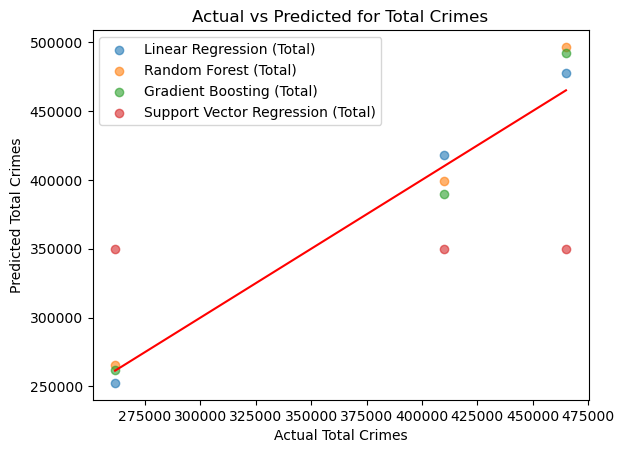

Linear Regression for Crime Rate Mean Squared Error: 89.16578900808842
Linear Regression for Crime Rate Accuracy: 0.9665431262558575

Random Forest for Crime Rate Mean Squared Error: 244.65502529253015
Random Forest for Crime Rate Accuracy: 0.9082003043640462

Gradient Boosting for Crime Rate Mean Squared Error: 197.79705753194688
Gradient Boosting for Crime Rate Accuracy: 0.9257823964277494

Support Vector Regression for Crime Rate Mean Squared Error: 2996.3491795168443
Support Vector Regression for Crime Rate Accuracy: -0.12429304229413018



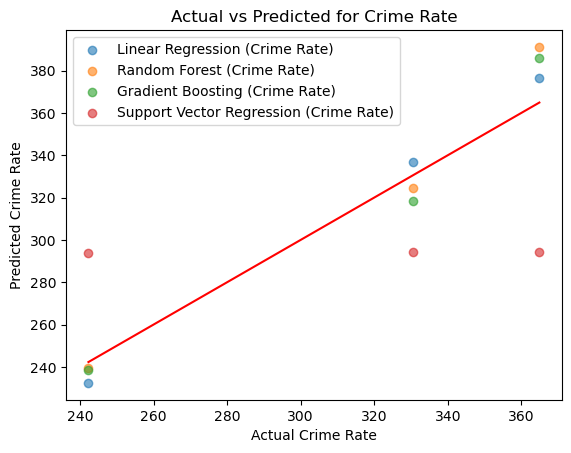

Linear Regression Future Predictions for Total Crimes: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Total Crimes: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Total Crimes: [346.15474385 345.19549333 347.84408433]
Support Vector Regression Future Predictions for Total Crimes: [293.73449893 293.73447083 293.73444273]
Linear Regression Future Predictions for Crime Rate: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Crime Rate: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Crime Rate: [346.15474385 345.19549333 347.84408433]
Support Vector Regression Future Predictions for Crime Rate: [293.73449893 293.73447083 293.73444273]


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models, including SVM
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')  # Using RBF kernel
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")


In [60]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:00a 0:00:01


Linear Regression for Total Mean Squared Error: 97575087.90617709
Linear Regression for Total Accuracy: 0.9868056654395059

Random Forest for Total Mean Squared Error: 374866037.4853335
Random Forest for Total Accuracy: 0.9493097262827564

Gradient Boosting for Total Mean Squared Error: 379890848.8743574
Gradient Boosting for Total Accuracy: 0.948630259382005

Support Vector Regression for Total Mean Squared Error: 8236168670.059325
Support Vector Regression for Total Accuracy: -0.11371424060529134

XGBoost for Total Mean Squared Error: 377127327.46158856
XGBoost for Total Accuracy: 0.9490039348602295



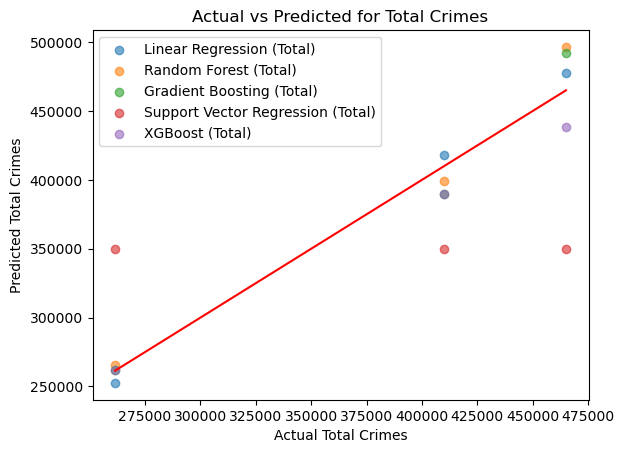

Linear Regression for Crime Rate Mean Squared Error: 89.16578900808842
Linear Regression for Crime Rate Accuracy: 0.9665431262558575

Random Forest for Crime Rate Mean Squared Error: 244.65502529253015
Random Forest for Crime Rate Accuracy: 0.9082003043640462

Gradient Boosting for Crime Rate Mean Squared Error: 197.79705753194688
Gradient Boosting for Crime Rate Accuracy: 0.9257823964277494

Support Vector Regression for Crime Rate Mean Squared Error: 2996.3491795168443
Support Vector Regression for Crime Rate Accuracy: -0.12429304229413018

XGBoost for Crime Rate Mean Squared Error: 142.18299633033223
XGBoost for Crime Rate Accuracy: 0.9466499583561551



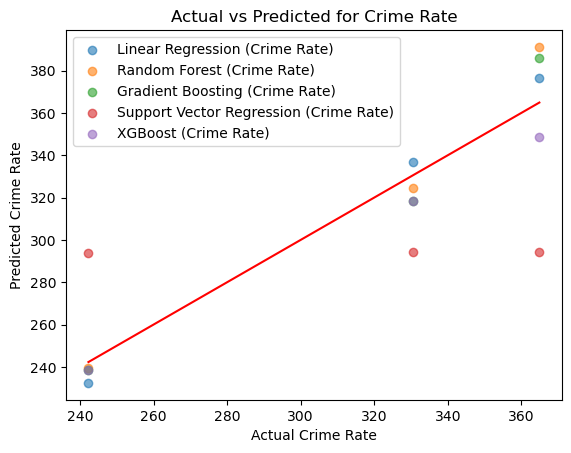

Linear Regression Future Predictions for Total Crimes: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Total Crimes: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Total Crimes: [346.15474385 345.19549333 347.84408433]
Support Vector Regression Future Predictions for Total Crimes: [293.73449893 293.73447083 293.73444273]
XGBoost Future Predictions for Total Crimes: [490.65002 490.65002 490.65002]
Linear Regression Future Predictions for Crime Rate: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Crime Rate: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Crime Rate: [346.15474385 345.19549333 347.84408433]
Support Vector Regression Future Predictions for Crime Rate: [293.73449893 293.73447083 293.73444273]
XGBoost Future Predictions for Crime Rate: [490.65002 490.65002 490.65002]


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Import XGBoost

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models, including XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),  # Using RBF kernel
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")



Evaluating model for: Total
Linear Regression for Total Mean Squared Error: 97575087.90617709
Linear Regression for Total Accuracy: 0.9868056654395059

Random Forest for Total Mean Squared Error: 374866037.4853335
Random Forest for Total Accuracy: 0.9493097262827564

Gradient Boosting for Total Mean Squared Error: 379890848.8743574
Gradient Boosting for Total Accuracy: 0.948630259382005

Support Vector Regression for Total Mean Squared Error: 8236168670.059325
Support Vector Regression for Total Accuracy: -0.11371424060529134

XGBoost for Total Mean Squared Error: 377127327.46158856
XGBoost for Total Accuracy: 0.9490039348602295



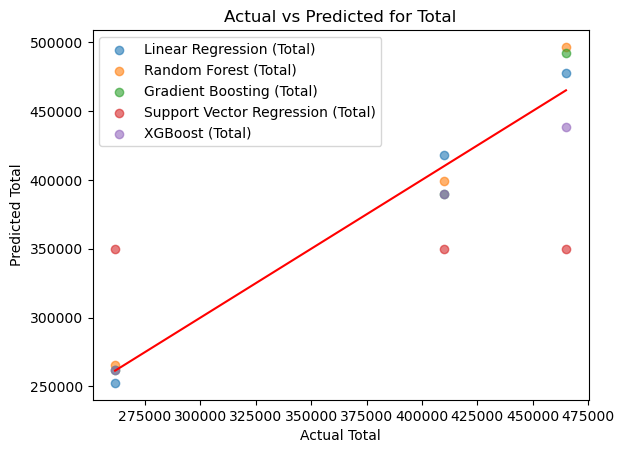


Evaluating model for: Rape
Linear Regression for Rape Mean Squared Error: 3068431.534749443
Linear Regression for Rape Accuracy: 0.9438831639209571

Random Forest for Rape Mean Squared Error: 12940525.835333318
Random Forest for Rape Accuracy: 0.7633379272588795

Gradient Boosting for Rape Mean Squared Error: 9695506.309246417
Gradient Boosting for Rape Accuracy: 0.8226842828012664

Support Vector Regression for Rape Mean Squared Error: 55086518.88190458
Support Vector Regression for Rape Accuracy: -0.007446676014353004

XGBoost for Rape Mean Squared Error: 1604683.0677604675
XGBoost for Rape Accuracy: 0.9706528186798096



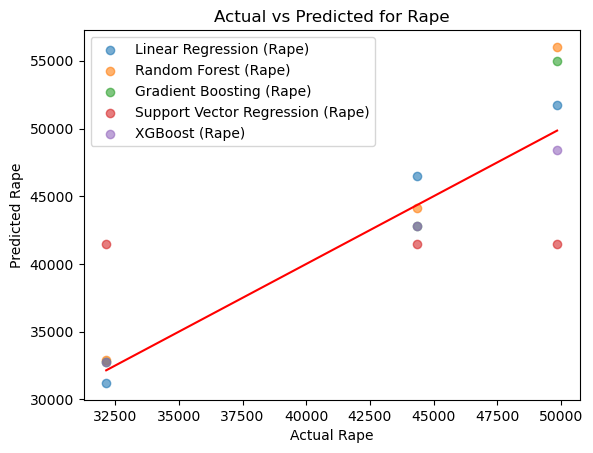


Evaluating model for: Kidnapping and Abduction
Linear Regression for Kidnapping and Abduction Mean Squared Error: 1900483.3729748894
Linear Regression for Kidnapping and Abduction Accuracy: 0.9950218735058944

Random Forest for Kidnapping and Abduction Mean Squared Error: 34345547.40120002
Random Forest for Kidnapping and Abduction Accuracy: 0.9100352668674825

Gradient Boosting for Kidnapping and Abduction Mean Squared Error: 27894858.647414412
Gradient Boosting for Kidnapping and Abduction Accuracy: 0.9269322021667282

Support Vector Regression for Kidnapping and Abduction Mean Squared Error: 586328680.5457633
Support Vector Regression for Kidnapping and Abduction Accuracy: -0.5358294528564618

XGBoost for Kidnapping and Abduction Mean Squared Error: 31637401.28388087
XGBoost for Kidnapping and Abduction Accuracy: 0.9171289801597595



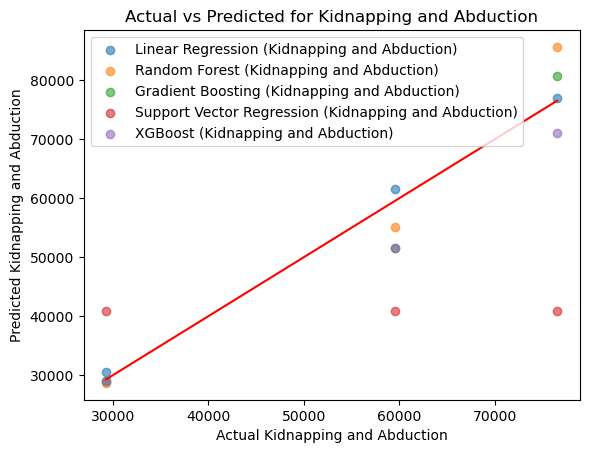


Evaluating model for: Dowry Deaths
Linear Regression for Dowry Deaths Mean Squared Error: 1556765.5138900515
Linear Regression for Dowry Deaths Accuracy: 0.1866406207906266

Random Forest for Dowry Deaths Mean Squared Error: 95331.91599999939
Random Forest for Dowry Deaths Accuracy: 0.9501921726009689

Gradient Boosting for Dowry Deaths Mean Squared Error: 34567.79496281045
Gradient Boosting for Dowry Deaths Accuracy: 0.9819394507389029

Support Vector Regression for Dowry Deaths Mean Squared Error: 2179914.0972098876
Support Vector Regression for Dowry Deaths Accuracy: -0.13893425889547295

XGBoost for Dowry Deaths Mean Squared Error: 198836.9921989441
XGBoost for Dowry Deaths Accuracy: 0.8961141109466553



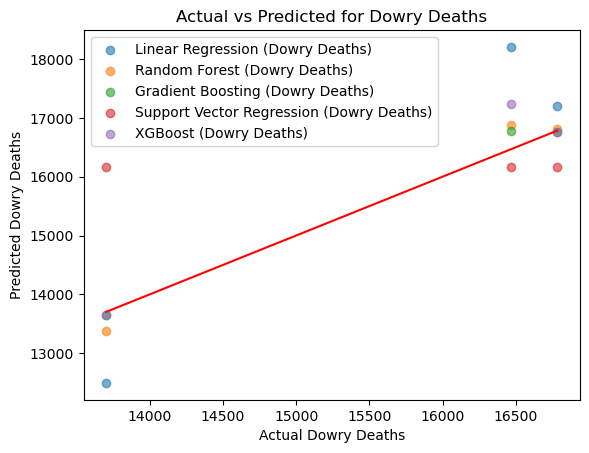


Evaluating model for: Assault on women with intent to outrage her modesty
Linear Regression for Assault on women with intent to outrage her modesty Mean Squared Error: 7577258.590880883
Linear Regression for Assault on women with intent to outrage her modesty Accuracy: 0.9105523815096346

Random Forest for Assault on women with intent to outrage her modesty Mean Squared Error: 99598389.99306674
Random Forest for Assault on women with intent to outrage her modesty Accuracy: -0.1757337674968784

Gradient Boosting for Assault on women with intent to outrage her modesty Mean Squared Error: 69043776.98356746
Gradient Boosting for Assault on women with intent to outrage her modesty Accuracy: 0.18495570017994334

Support Vector Regression for Assault on women with intent to outrage her modesty Mean Squared Error: 91662077.65182565
Support Vector Regression for Assault on women with intent to outrage her modesty Accuracy: -0.08204761042497277

XGBoost for Assault on women with intent to outra

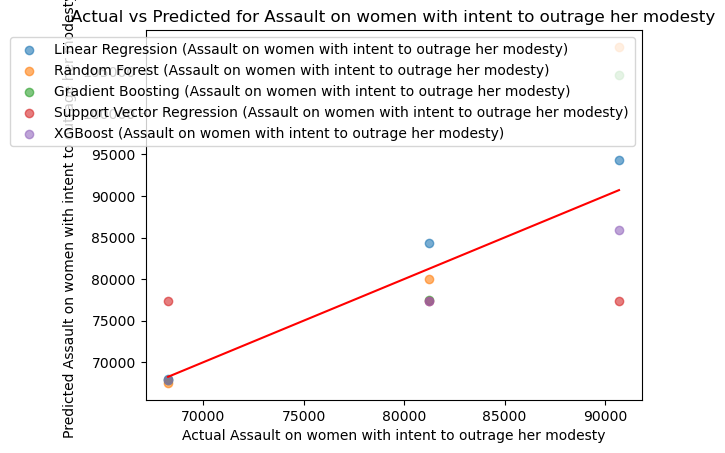


Evaluating model for: Insult to modesty of Women
Linear Regression for Insult to modesty of Women Mean Squared Error: 268083.8669611147
Linear Regression for Insult to modesty of Women Accuracy: 0.39408346308831554

Random Forest for Insult to modesty of Women Mean Squared Error: 2575906.8556000036
Random Forest for Insult to modesty of Women Accuracy: -4.822001073934862

Gradient Boosting for Insult to modesty of Women Mean Squared Error: 2893338.6622030083
Gradient Boosting for Insult to modesty of Women Accuracy: -5.539452605587122

Support Vector Regression for Insult to modesty of Women Mean Squared Error: 1558988.830920361
Support Vector Regression for Insult to modesty of Women Accuracy: -2.5235880630305756

XGBoost for Insult to modesty of Women Mean Squared Error: 2172257.1510645547
XGBoost for Insult to modesty of Women Accuracy: -3.909681797027588



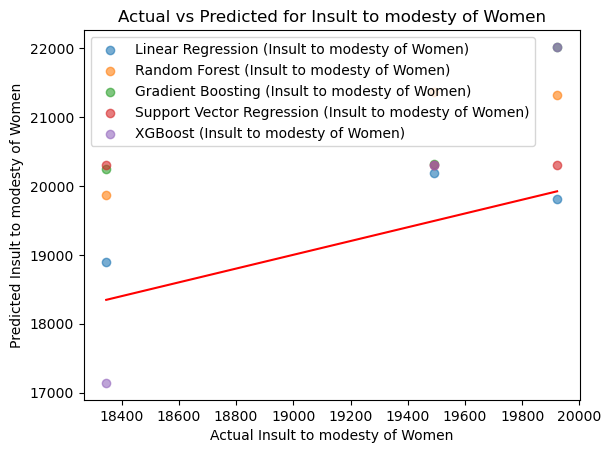


Evaluating model for: Cruelty by Husband or his Relatives
Linear Regression for Cruelty by Husband or his Relatives Mean Squared Error: 28285345.797754075
Linear Regression for Cruelty by Husband or his Relatives Accuracy: 0.988342098210707

Random Forest for Cruelty by Husband or his Relatives Mean Squared Error: 16535694.595866712
Random Forest for Cruelty by Husband or his Relatives Accuracy: 0.9931847570471751

Gradient Boosting for Cruelty by Husband or his Relatives Mean Squared Error: 30384022.48262715
Gradient Boosting for Cruelty by Husband or his Relatives Accuracy: 0.9874771214536728

Support Vector Regression for Cruelty by Husband or his Relatives Mean Squared Error: 2640365667.437668
Support Vector Regression for Cruelty by Husband or his Relatives Accuracy: -0.08823571961611054

XGBoost for Cruelty by Husband or his Relatives Mean Squared Error: 99801820.40659587
XGBoost for Cruelty by Husband or his Relatives Accuracy: 0.9588663578033447



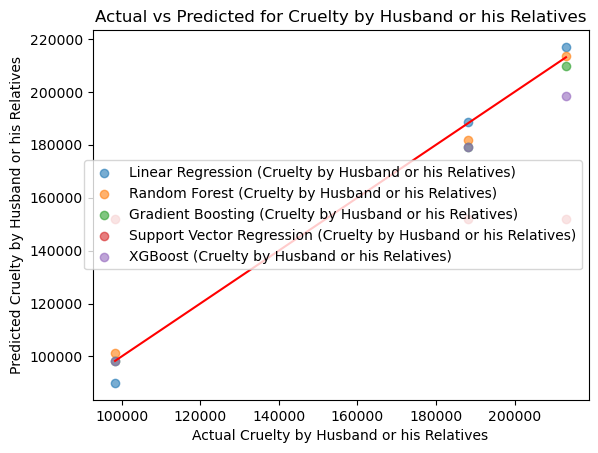


Evaluating model for: Importation of Girls
Linear Regression for Importation of Girls Mean Squared Error: 5739.831435585624
Linear Regression for Importation of Girls Accuracy: -0.339968948959084

Random Forest for Importation of Girls Mean Squared Error: 2881.684266666667
Random Forest for Importation of Girls Accuracy: 0.32726814691844774

Gradient Boosting for Importation of Girls Mean Squared Error: 2249.5400010550334
Gradient Boosting for Importation of Girls Accuracy: 0.47484280946526003

Support Vector Regression for Importation of Girls Mean Squared Error: 4307.5022799930975
Support Vector Regression for Importation of Girls Accuracy: -0.00559038493302233

XGBoost for Importation of Girls Mean Squared Error: 2705.350343035301
XGBoost for Importation of Girls Accuracy: 0.36843341588974



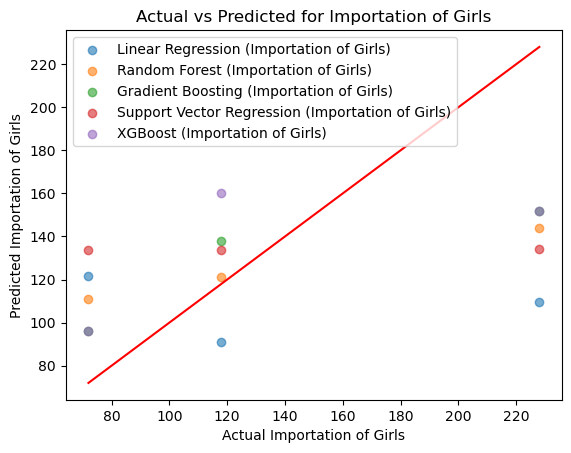

Linear Regression Future Predictions for Total: [-22949.76532005 -23228.91522185 -23508.06512366]
Random Forest Future Predictions for Total: [139.78 138.84 166.52]
Gradient Boosting Future Predictions for Total: [117.57921018 101.08242574 119.93385898]
Support Vector Regression Future Predictions for Total: [134.03667901 134.03669172 134.03670444]
XGBoost Future Predictions for Total: [28.001226 28.001226 28.001226]
Linear Regression Future Predictions for Rape: [-22949.76532005 -23228.91522185 -23508.06512366]
Random Forest Future Predictions for Rape: [139.78 138.84 166.52]
Gradient Boosting Future Predictions for Rape: [117.57921018 101.08242574 119.93385898]
Support Vector Regression Future Predictions for Rape: [134.03667901 134.03669172 134.03670444]
XGBoost Future Predictions for Rape: [28.001226 28.001226 28.001226]
Linear Regression Future Predictions for Kidnapping and Abduction: [-22949.76532005 -23228.91522185 -23508.06512366]
Random Forest Future Predictions for Kidnappin

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Import XGBoost

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_columns = ['Total', 'Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
                  'Assault on women with intent to outrage her modesty', 
                  'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 
                  'Importation of Girls']

# Step 3: Split the data into training and testing sets for each crime type
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),  # Using RBF kernel
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
}

# Step 4: Train, predict, and evaluate each model for each target
for target in target_columns:
    target_values = merged_df[target]
    X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)

    print(f"\nEvaluating model for: {target}")

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, predictions)
        accuracy = model.score(X_test, y_test)

        print(f'{model_name} for {target} Mean Squared Error: {mse}')
        print(f'{model_name} for {target} Accuracy: {accuracy}\n')

        # Plotting actual vs predicted values
        plt.scatter(y_test, predictions, label=f'{model_name} ({target})', alpha=0.6)

    # Step 5: Formatting the plot for each target
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted for {target}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.legend()
    plt.show()

# Step 6: Predicting future values for all targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for all crime types
for target in target_columns:
    target_values = merged_df[target]
    
    for model_name, model in models.items():
        future_predictions = model.predict(future_years)
        print(f"{model_name} Future Predictions for {target}: {future_predictions}")


Linear Regression for Total Mean Squared Error: 97575087.90617709
Linear Regression for Total Accuracy: 0.9868056654395059

Random Forest for Total Mean Squared Error: 374866037.4853335
Random Forest for Total Accuracy: 0.9493097262827564

Gradient Boosting for Total Mean Squared Error: 379890848.8743574
Gradient Boosting for Total Accuracy: 0.948630259382005



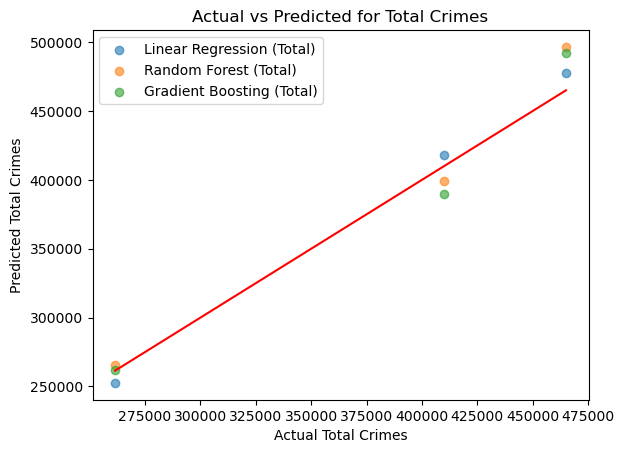

Linear Regression for Crime Rate Mean Squared Error: 89.16578900808842
Linear Regression for Crime Rate Accuracy: 0.9665431262558575

Random Forest for Crime Rate Mean Squared Error: 244.65502529253015
Random Forest for Crime Rate Accuracy: 0.9082003043640462

Gradient Boosting for Crime Rate Mean Squared Error: 197.79705753194688
Gradient Boosting for Crime Rate Accuracy: 0.9257823964277494



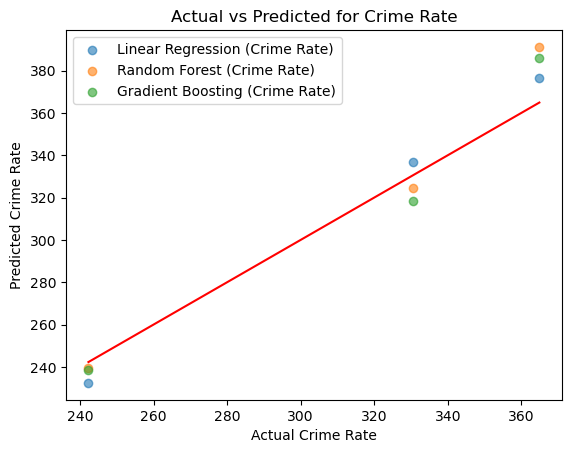

Linear Regression Future Predictions for Total Crimes: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Total Crimes: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Total Crimes: [346.15474385 345.19549333 347.84408433]
Linear Regression Future Predictions for Crime Rate: [4742.28550229 4825.01899799 4907.75249369]
Random Forest Future Predictions for Crime Rate: [325.97203485 326.03975534 327.20230855]
Gradient Boosting Future Predictions for Crime Rate: [346.15474385 345.19549333 347.84408433]


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")


In [16]:
import numpy as np
from numpy.polynomial import Polynomial

years = np.array([2001, 2011])
literacy_rates = np.array([64.83, 74.04])

# Fit a polynomial of degree 1 (linear) or higher
p = Polynomial.fit(years, literacy_rates, deg=1)  # Change deg=2 for quadratic
estimated_rates = p(np.arange(2001, 2015))

In [17]:
print(estimated_rates)

[64.83  65.751 66.672 67.593 68.514 69.435 70.356 71.277 72.198 73.119
 74.04  74.961 75.882 76.803]


In [20]:
import numpy as np

L1 = 64.83
L2 = 74.04
t = 10

r = np.log(L2 / L1) / t
estimated_rates = L1 * np.exp(r * (np.arange(0, 15)))


In [21]:
print(estimated_rates)

[64.83       65.69692771 66.57544826 67.46571668 68.36789004 69.28212757
 70.20859057 71.14744253 72.09884913 73.06297824 74.04       75.03008681
 76.03341338 77.05015676 78.08049636]
